In [16]:
import numpy as np
import netCDF4 as nc
import os
from salishsea_tools import viz_tools, visualisations, geo_tools
import matplotlib.pyplot as plt
import cmocean
import matplotlib as mpl

mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rc('legend', fontsize=12)
mpl.rc('axes', titlesize=12)
mpl.rc('axes', labelsize=12)
mpl.rc('figure', titlesize=12)
mpl.rc('font', size=12)
mpl.rc('text', usetex=True)
mpl.rc('text.latex', preamble = ','.join(r'''
 \usepackage{txfonts}
 \usepackage{lmodern}
 '''.split()))
mpl.rc('font', family='sans-serif', weight='normal', style='normal')
%matplotlib inline

In [2]:
resDir='/results2/SalishSea/hindcast.201812_annex/01apr17/'
f=nc.Dataset(os.path.join(resDir,'SalishSea_1h_20170401_20170401_grid_T.nc'))

In [3]:
m=nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc')
tmask=m.variables['tmask'][:,:,:,:]
tmask=np.copy(m.variables['tmask'])
navlon=np.copy(m.variables['nav_lon'])
navlat=np.copy(m.variables['nav_lat'])
m.close()
fb=nc.Dataset('/data/eolson/MEOPAR/NEMO-forcing-new/grid/bathymetry_201702.nc')
fm=nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc')

In [4]:
cm1=cmocean.cm.haline

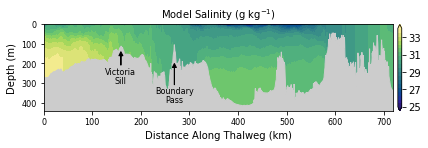

In [5]:
fig = plt.figure(figsize=(6,2))
ax = fig.add_axes([0.04, 0.10, 0.9, 0.9])
cbar=visualisations.contour_thalweg(ax,f.variables['vosaline'][0,:,:,:],fb,fm,
                cmap=cm1,clevels=(np.linspace(25,34,21)),land_colour=(.8,.8,.8)) #,mesh_args={'vmin':1,'vmax':1}
cbar.set_ticks((25,27,29,31,33))
ax.set_title('Model Salinity (g kg$^{-1}$)',fontsize=10)
ax.set_xlabel('Distance Along Thalweg (km)',fontsize=10)
ax.set_ylabel('Depth (m)',fontsize=10)
ax.set_position((0.11, 0.25, 0.81, 0.6))
cbar.ax.set_position((.93,.25,.05,.6))
ax.annotate('Victoria\nSill', xy=(159,140), xytext=(159,300),linespacing=1,ha='center',
                arrowprops=dict(facecolor='black', width=.2,headwidth=4,headlength=4),fontsize=8)
ax.annotate('Boundary\nPass', xy=(269,200), xytext=(269,400),linespacing=1,ha='center',
                arrowprops=dict(facecolor='black', width=.2,headwidth=4,headlength=4),fontsize=8)
ax.tick_params(axis='both', which='major', labelsize=8)
fig.savefig('/data/eolson/results/MEOPAR/biomodelevalpaper/figsMod/ThWSal.png',dpi=300)
#ax.plot(155,130,'r*')
#ax.plot(267,110,'c*')
#ax.plot(330,180,'m*')

In [14]:
resDir2='/results2/SalishSea/hindcast.201812_annex/01may17/'
f2=nc.Dataset(os.path.join(resDir2,'SalishSea_1d_20170501_20170501_grid_T.nc'))
f2p=nc.Dataset(os.path.join(resDir2,'SalishSea_1d_20170501_20170501_ptrc_T.nc'))

In [25]:
cm2=cmocean.cm.thermal
cm3=cmocean.cm.matter

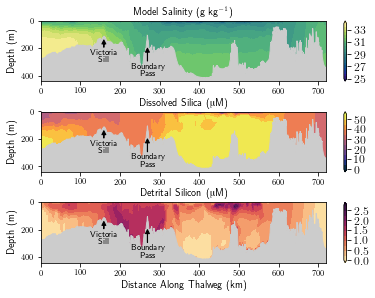

In [32]:
fig,axs = plt.subplots(3,1,figsize=(5.5,4))
fig.subplots_adjust(left=.1,bottom=.1,top=.94,right=1,hspace=.5)
ax = axs[0]
cbar=visualisations.contour_thalweg(ax,f2.variables['vosaline'][0,:,:,:],fb,fm,
                cmap=cm1,clevels=(np.linspace(25,34,21)),land_colour=(.8,.8,.8)) #,mesh_args={'vmin':1,'vmax':1}
cbar.set_ticks((25,27,29,31,33))
ax.set_title('Model Salinity (g kg$^{-1}$)',fontsize=10)
ax.set_xlabel('',fontsize=10)
ax.set_ylabel('Depth (m)',fontsize=10)
#ax.set_position((0.11, 0.25, 0.81, 0.6))
#cbar.ax.set_position((.93,.25,.05,.6))
ax.annotate('Victoria\nSill', xy=(159,140), xytext=(159,300),linespacing=1,ha='center',
                arrowprops=dict(facecolor='black', width=.2,headwidth=4,headlength=4),fontsize=8)
ax.annotate('Boundary\nPass', xy=(269,200), xytext=(269,400),linespacing=1,ha='center',
                arrowprops=dict(facecolor='black', width=.2,headwidth=4,headlength=4),fontsize=8)
ax.tick_params(axis='both', which='major', labelsize=8)

ax = axs[1]
cbar=visualisations.contour_thalweg(ax,f2p.variables['silicon'][0,:,:,:],fb,fm,
                cmap=cm2,clevels=10,land_colour=(.8,.8,.8)) #,mesh_args={'vmin':1,'vmax':1}
#cbar.set_ticks((25,27,29,31,33))
ax.set_title('Dissolved Silica ($\muup$M)',fontsize=10)
ax.set_xlabel(' ',fontsize=10)
ax.set_ylabel('Depth (m)',fontsize=10)
#ax.set_position((0.11, 0.25, 0.81, 0.6))
#cbar.ax.set_position((.93,.25,.05,.6))
ax.annotate('Victoria\nSill', xy=(159,140), xytext=(159,300),linespacing=1,ha='center',
                arrowprops=dict(facecolor='black', width=.2,headwidth=4,headlength=4),fontsize=8)
ax.annotate('Boundary\nPass', xy=(269,200), xytext=(269,400),linespacing=1,ha='center',
                arrowprops=dict(facecolor='black', width=.2,headwidth=4,headlength=4),fontsize=8)
ax.tick_params(axis='both', which='major', labelsize=8)

ax = axs[2]
cbar=visualisations.contour_thalweg(ax,f2p.variables['biogenic_silicon'][0,:,:,:],fb,fm,
                cmap=cm3,clevels=10,land_colour=(.8,.8,.8)) #,mesh_args={'vmin':1,'vmax':1}
#cbar.set_ticks((25,27,29,31,33))
ax.set_title('Detrital Silicon ($\muup$M)',fontsize=10)
ax.set_xlabel('Distance Along Thalweg (km)',fontsize=10)
ax.set_ylabel('Depth (m)',fontsize=10)
#ax.set_position((0.11, 0.25, 0.81, 0.6))
#cbar.ax.set_position((.93,.25,.05,.6))
ax.annotate('Victoria\nSill', xy=(159,140), xytext=(159,300),linespacing=1,ha='center',
                arrowprops=dict(facecolor='black', width=.2,headwidth=4,headlength=4),fontsize=8)
ax.annotate('Boundary\nPass', xy=(269,200), xytext=(269,400),linespacing=1,ha='center',
                arrowprops=dict(facecolor='black', width=.2,headwidth=4,headlength=4),fontsize=8)
ax.tick_params(axis='both', which='major', labelsize=8)
fig.savefig('/home/eolson/pyCode/notebooks/figs/ThWSalSibSi.png',dpi=300)
#ax.plot(155,130,'r*')
#ax.plot(267,110,'c*')
#ax.plot(330,180,'m*')

In [6]:
thw_pts=np.loadtxt('/data/nsoontie/MEOPAR/tools/bathymetry/thalweg_working.txt', delimiter=' ', dtype=int)
#thw=np.array([[a,b] for (a,b) in iso90_pts])


In [7]:
thw_pts

array([[406,   2],
       [406,   3],
       [406,   4],
       ...,
       [896,  43],
       [896,  42],
       [897,  42]])

In [8]:
lons_thal = navlon[thw_pts[:, 0], thw_pts[:, 1]]
lats_thal = navlat[thw_pts[:, 0], thw_pts[:, 1]]
xx_thal = geo_tools.distance_along_curve(lons_thal, lats_thal)


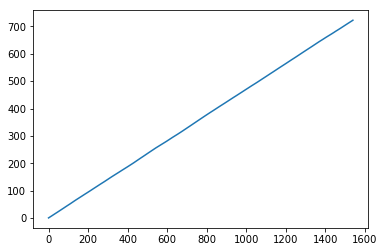

In [9]:
plt.plot(xx_thal)

In [10]:
i1=np.argmin(np.abs(xx_thal-155))
i2=np.argmin(np.abs(xx_thal-267))
i3=np.argmin(np.abs(xx_thal-330))

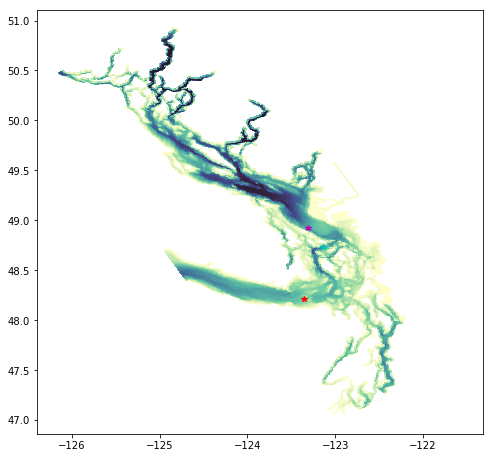

In [11]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
ax.pcolormesh(navlon,navlat,fb.variables['Bathymetry'],cmap=cmocean.cm.deep)
viz_tools.set_aspect(ax,coords='map')
ax.plot(navlon[thw_pts[i1,0],thw_pts[i1,1]],navlat[thw_pts[i1,0],thw_pts[i1,1]],'r*')
ax.plot(navlon[thw_pts[i2,0],thw_pts[i2,1]],navlat[thw_pts[i2,0],thw_pts[i2,1]],'c*')
ax.plot(navlon[thw_pts[i3,0],thw_pts[i3,1]],navlat[thw_pts[i3,0],thw_pts[i3,1]],'m*')